In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [4]:
# Uploading the CSV file
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep="\t")

In [5]:
# Setting the view to display all the columns
pd.set_option('display.max_columns', None)

In [6]:
# Checking for null values in the df
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.shape

(2240, 29)

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# **Data cleaning**

In [10]:
# Creating an age column based on the year of birth
current_year = dt.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [11]:
# Clearing the columns we won't be using as part of our analysis
df.drop(['Z_CostContact'],axis=1, inplace = True)
df.drop(['Z_Revenue'],axis=1, inplace = True)
df.drop(['ID'],axis=1, inplace = True)

In [12]:
# Converting the date when customers became customers into datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [13]:
# Exploring the outliers for age 
customers_over_100 = df[df['Age'] > 100]
num_customers_over_100 = len(customers_over_100)

print('N of customers over the age of 100:', num_customers_over_100)

N of customers over the age of 100: 3


In [14]:
# Removing outliers
df = df[df['Age'] <= 100]

In [15]:
# Exploring the outliers for income
income_over_200K = df[df['Income'] > 200000]
num_income_over_200K = len(income_over_200K)

print('N of customers with income over 200K:', num_income_over_200K)

N of customers with income over 200K: 1


In [16]:
# Removing outliers
df = df[df['Income'] <= 200000]
df = df.dropna(subset=['Income'])


In [17]:
# Exploring the unique values in the Marital status column
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
# Cleaning the Marital status column
df['Marital_Status'] = df['Marital_Status'].replace({'Alone':'Single','Widow':'Widowed', 'Together':'Dating'})
df = df[~df['Marital_Status'].isin(['YOLO', 'Absurd'])]

In [19]:
# Exploring the unique values in the Education column
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [20]:
# Cleaning the Education column
df['Education'] = df['Education'].replace({'Basic':'Sec school','2n Cycle':'Masters', 'Graduation':'Bachelors', 'Master':'Masters', 'PhD':'Doctorate'})

In [21]:
# Fleshing out the data around parenthood
df['N_minors_home'] = df['Kidhome'] + df['Teenhome']
df['Parent'] = np.where(df.N_minors_home> 0, 1, 0)

In [22]:
# Simplifying column names
df = df.rename(columns = {
        'MntWines': 'Wines',
        'MntFruits': 'Fruits',
        'MntMeatProducts': 'Meat',
        'MntFishProducts': 'Fish',
        'MntSweetProducts': 'Sweets',
        'MntGoldProds': 'Gold'})

In [23]:
# Defining a spend column based on individual categories
df['TotalSpend'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [24]:
df.shape

(2208, 30)

In [25]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,N_minors_home,Parent,TotalSpend
count,2208.000000,2208.000000,2208.000000,2208.000000,2208,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.00000,2208.000000,2208.000000
mean,1968.904438,51943.520833,0.442482,0.505888,2013-07-10 12:50:13.043478272,49.057518,305.226902,26.298007,167.004076,37.527174,27.065217,43.782609,2.322464,4.086051,2.669384,5.805707,5.322464,0.073822,0.074275,0.072464,0.063859,0.013587,0.009058,0.149909,55.095562,0.94837,0.714674,606.903986
min,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.00000,0.000000,5.000000
25%,1959.000000,35196.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.750000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.00000,0.000000,69.000000
50%,1970.000000,51371.000000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.00000,1.000000,396.000000
75%,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.500000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.00000,1.000000,1047.250000
max,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,3.00000,1.000000,2525.000000
std,11.697572,21536.756816,0.537112,0.544330,NaN,28.935531,337.606819,39.731780,224.316242,54.578404,41.111454,51.513978,1.924304,2.743171,2.925185,3.253777,2.423679,0.261541,0.262278,0.259313,0.244556,0.115795,0.094763,0.357063,11.697572,0.74960,0.451672,602.775960


In [26]:
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Age         

# **Exploration and visualisation**

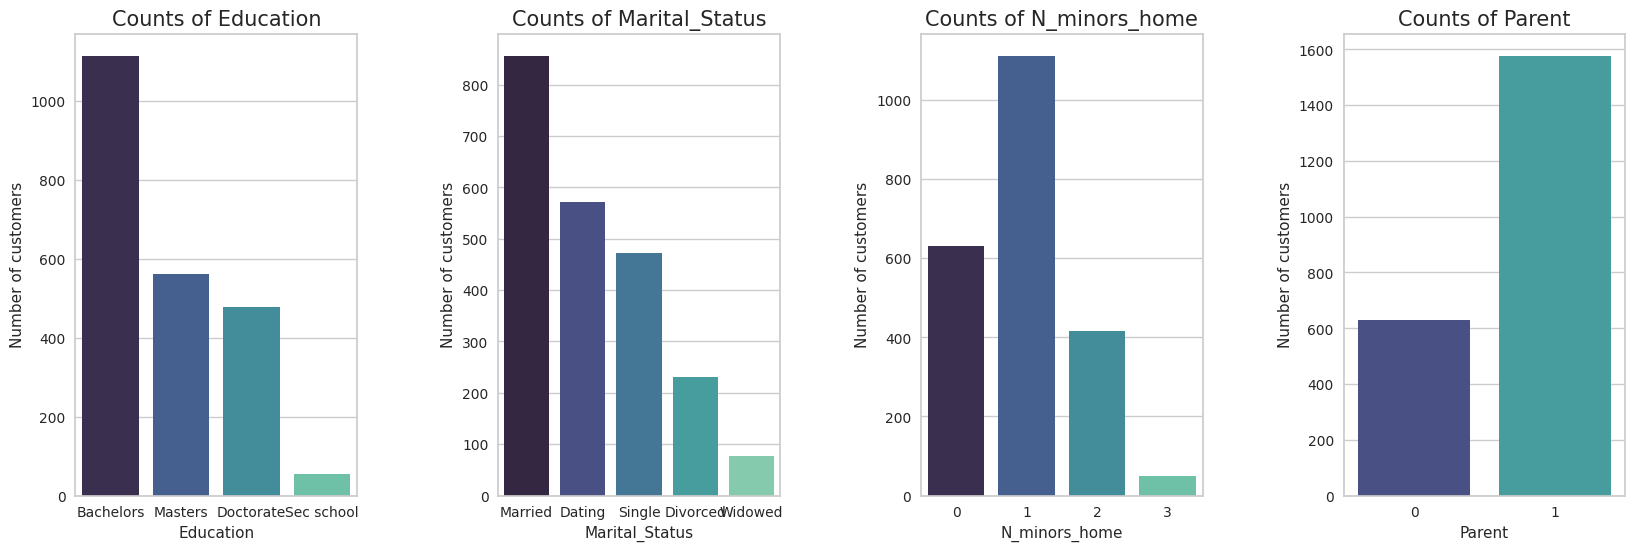

In [27]:
plt.figure(1, figsize=(20,6))
n=0
for x in ['Education' , 'Marital_Status' , 'N_minors_home', 'Parent']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace =0.5 , wspace =0.5)
    value_counts = df[x].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette = 'mako')
    plt.title('Counts of {}'.format(x), fontsize = 15)
    plt.xlabel(x)
    plt.ylabel('Number of customers')
plt.show()

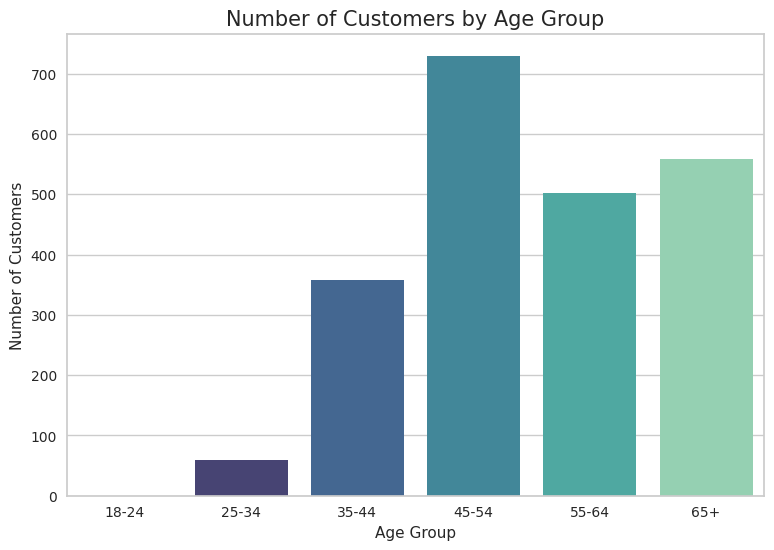

In [28]:
# Exploring the age groups of our customers
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

age_groups = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_counts = age_groups.value_counts().reindex(labels)

plt.figure(figsize=(9, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette = 'mako')
plt.title('Number of Customers by Age Group', fontsize=15)
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


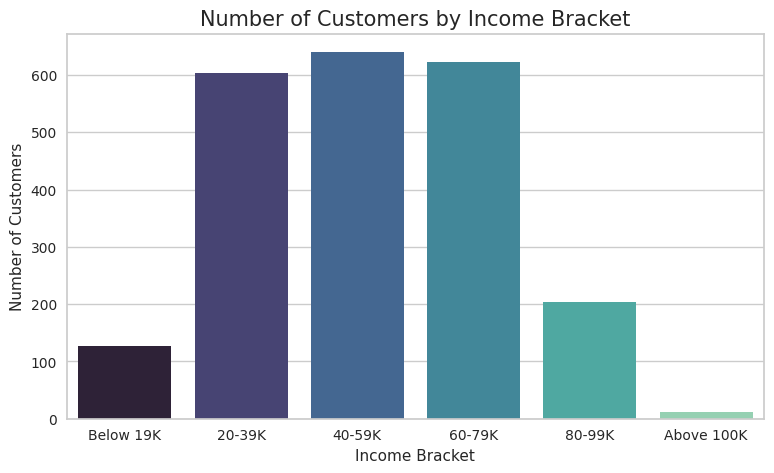

In [29]:
# Exploring the income brackets of our customers
bins = [0, 20000, 40000, 60000, 80000, 100000, np.inf]
labels = ['Below 19K', '20-39K', '40-59K', '60-79K', '80-99K', 'Above 100K']
income_brackets = pd.cut(df['Income'], bins = bins, labels = labels, right = False)
income_counts = income_brackets.value_counts().reindex(labels)

plt.figure(figsize=(9, 5))
sns.barplot(x = labels, y = income_counts.values, palette = 'mako')
plt.title('Number of Customers by Income Bracket', fontsize = 15)
plt.ylabel('Number of Customers')
plt.xlabel('Income Bracket')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

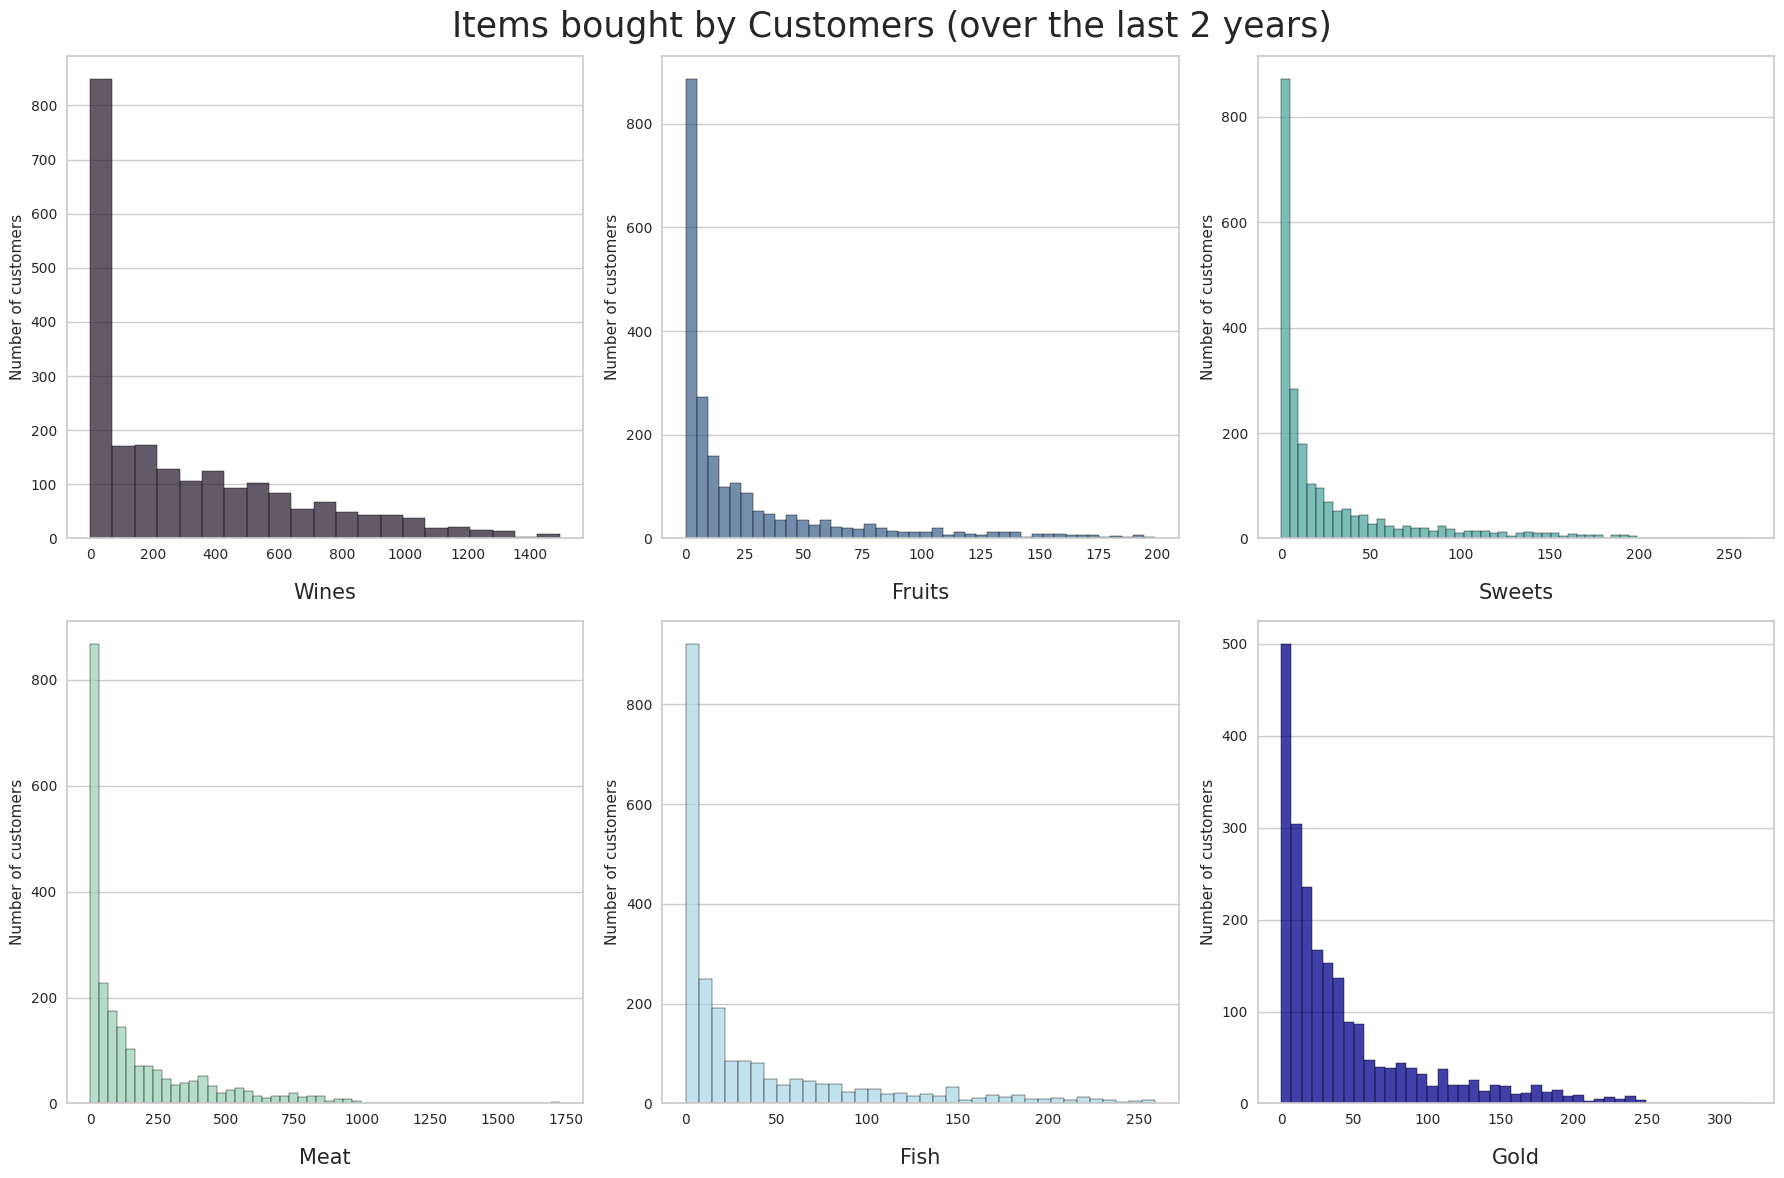

In [30]:
columns = ['Wines', 'Fruits', 'Sweets', 'Meat', 'Fish', 'Gold']
colors = ['#2e2237', '#446791', '#4fa8a1', '#9cd2b7', 'lightblue', 'darkblue']

fig, axes = plt.subplots(2, 3, figsize = (18, 12))
axes = axes.flatten()

for column, color, ax in zip(columns, colors, axes):
    sns.histplot(data=df[column], color = color, ax = ax)
    ax.set_xlabel(column, fontsize = 15, labelpad = 15)
    ax.set_ylabel('Number of customers')
    ax.grid(axis='x')

fig.suptitle('Items bought by Customers (over the last 2 years)', fontsize=25)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


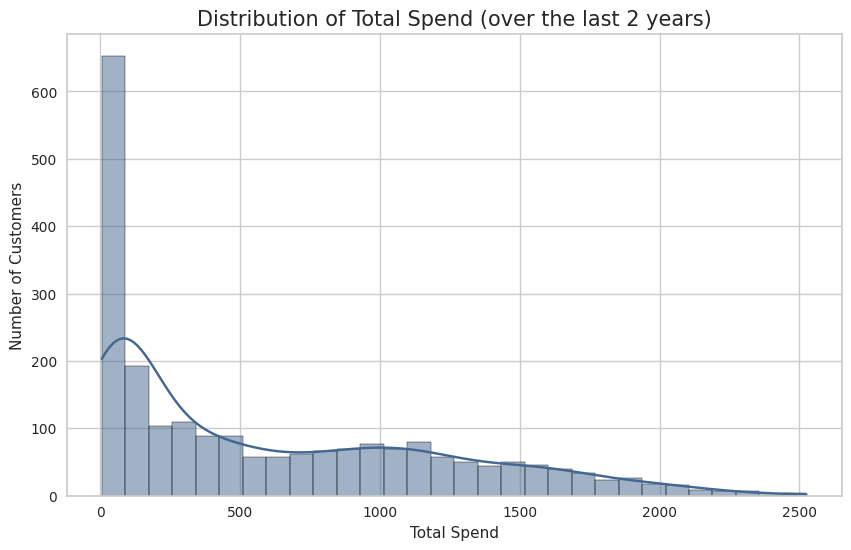

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalSpend'], kde=True, bins=30, color='#446791')
plt.title('Distribution of Total Spend (over the last 2 years)', fontsize=15)
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


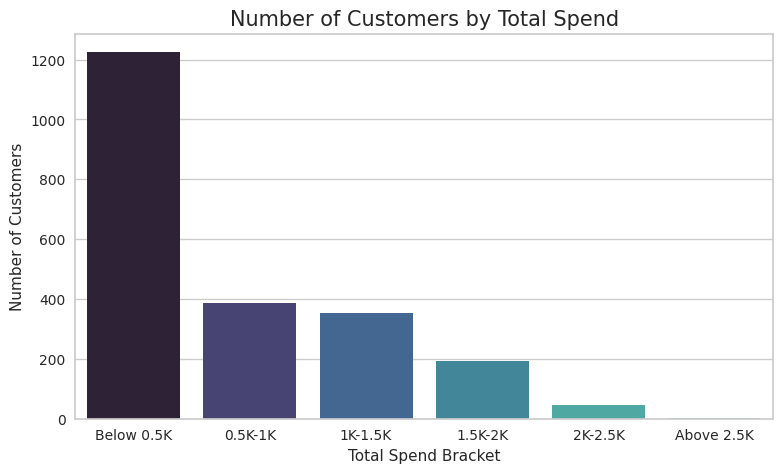

In [32]:
bins = [0, 500, 1000, 1500, 2000, 2500, np.inf]
labels = ['Below 0.5K', '0.5K-1K', '1K-1.5K', '1.5K-2K', '2K-2.5K', 'Above 2.5K']

spending_brackets = pd.cut(df['TotalSpend'], bins=bins, labels=labels, right=False)
spending_counts = spending_brackets.value_counts().reindex(labels)
plt.figure(figsize=(9, 5))
sns.barplot(x=labels, y=spending_counts, palette='mako')
plt.title('Number of Customers by Total Spend', fontsize=15)
plt.ylabel('Number of Customers')
plt.xlabel('Total Spend Bracket')
plt.show()

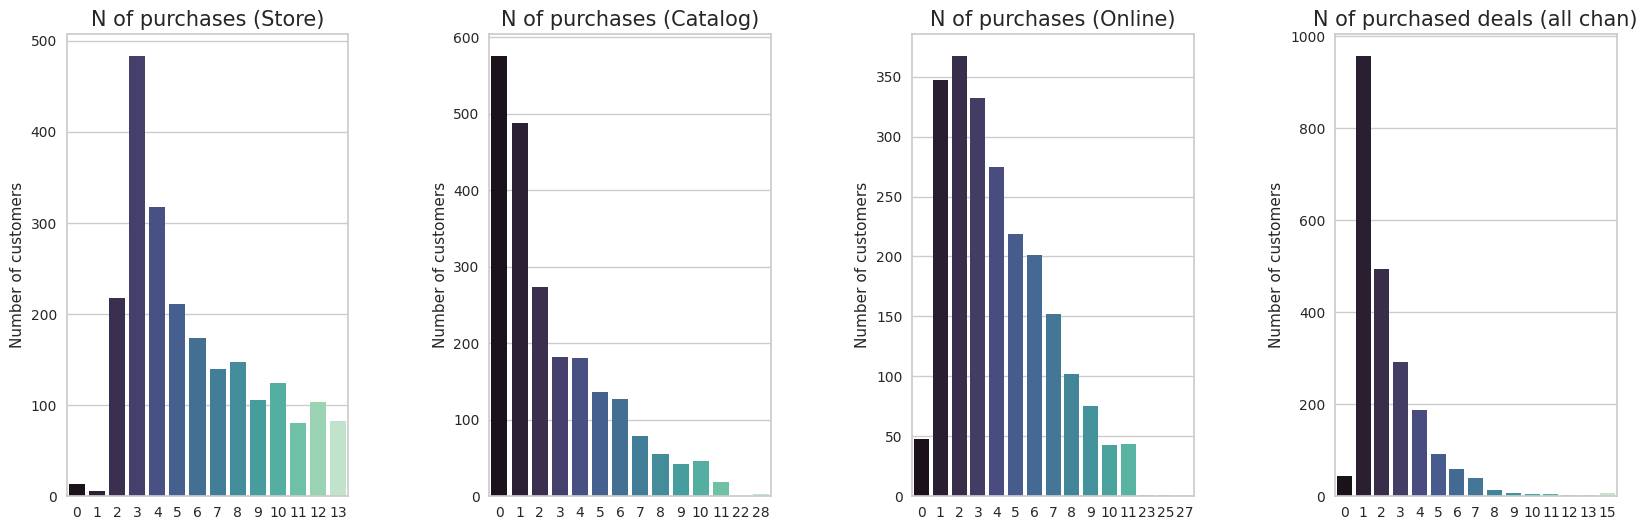

In [33]:
plt.figure(1, figsize = (20,6))
n = 0
labels = ['purchases (Store)', 'purchases (Catalog)', 'purchases (Online)', 'purchased deals (all chan)']

for x, label in zip(['NumStorePurchases' , 'NumCatalogPurchases' , 'NumWebPurchases', 'NumDealsPurchases'], labels):
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    value_counts = df[x].value_counts()
    sns.barplot(x = value_counts.index, y = value_counts.values, palette = 'mako')
    plt.title('N of {}'.format(label), fontsize = 15)
    plt.xlabel(None)
    plt.ylabel('Number of customers')
plt.show()

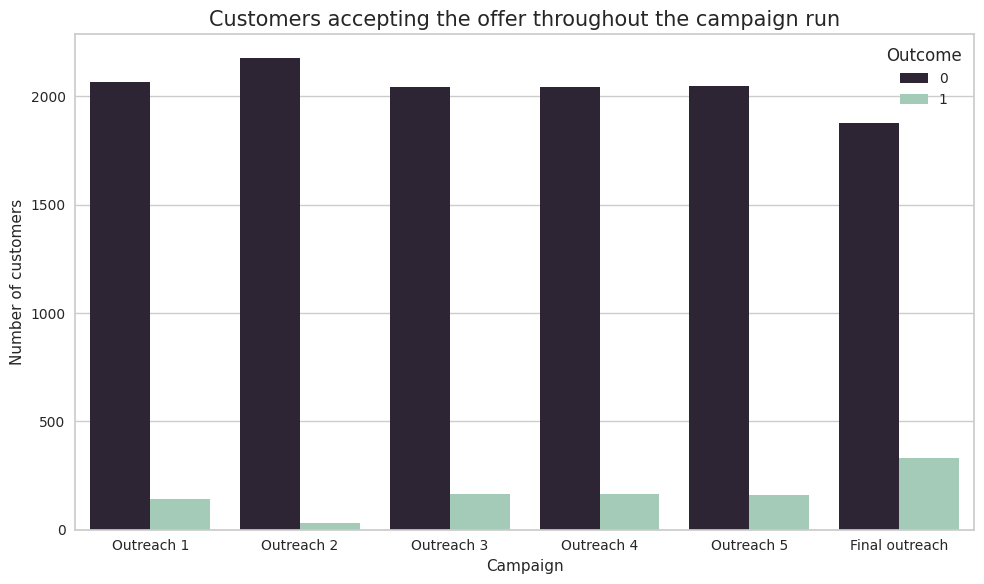

In [34]:
# Defining the campaign columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calculating the value counts for each campaign column
campaign_count = df[campaign_columns].apply(pd.Series.value_counts).T.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_count.melt(id_vars='index', var_name='Outcome', value_name='Count'), 
            x='index', y='Count', hue='Outcome', palette=['#2e2237', '#9cd2b7'])
plt.xlabel('Campaign')
plt.ylabel('Number of customers')
plt.title('Customers accepting the offer throughout the campaign run', fontsize=15)
plt.xticks(range(len(campaign_columns)), ['Outreach 1', 'Outreach 2', 'Outreach 3', 'Outreach 4', 'Outreach 5', 'Final outreach'])
plt.tight_layout()
plt.show()

# **Preparing the data for clustering**

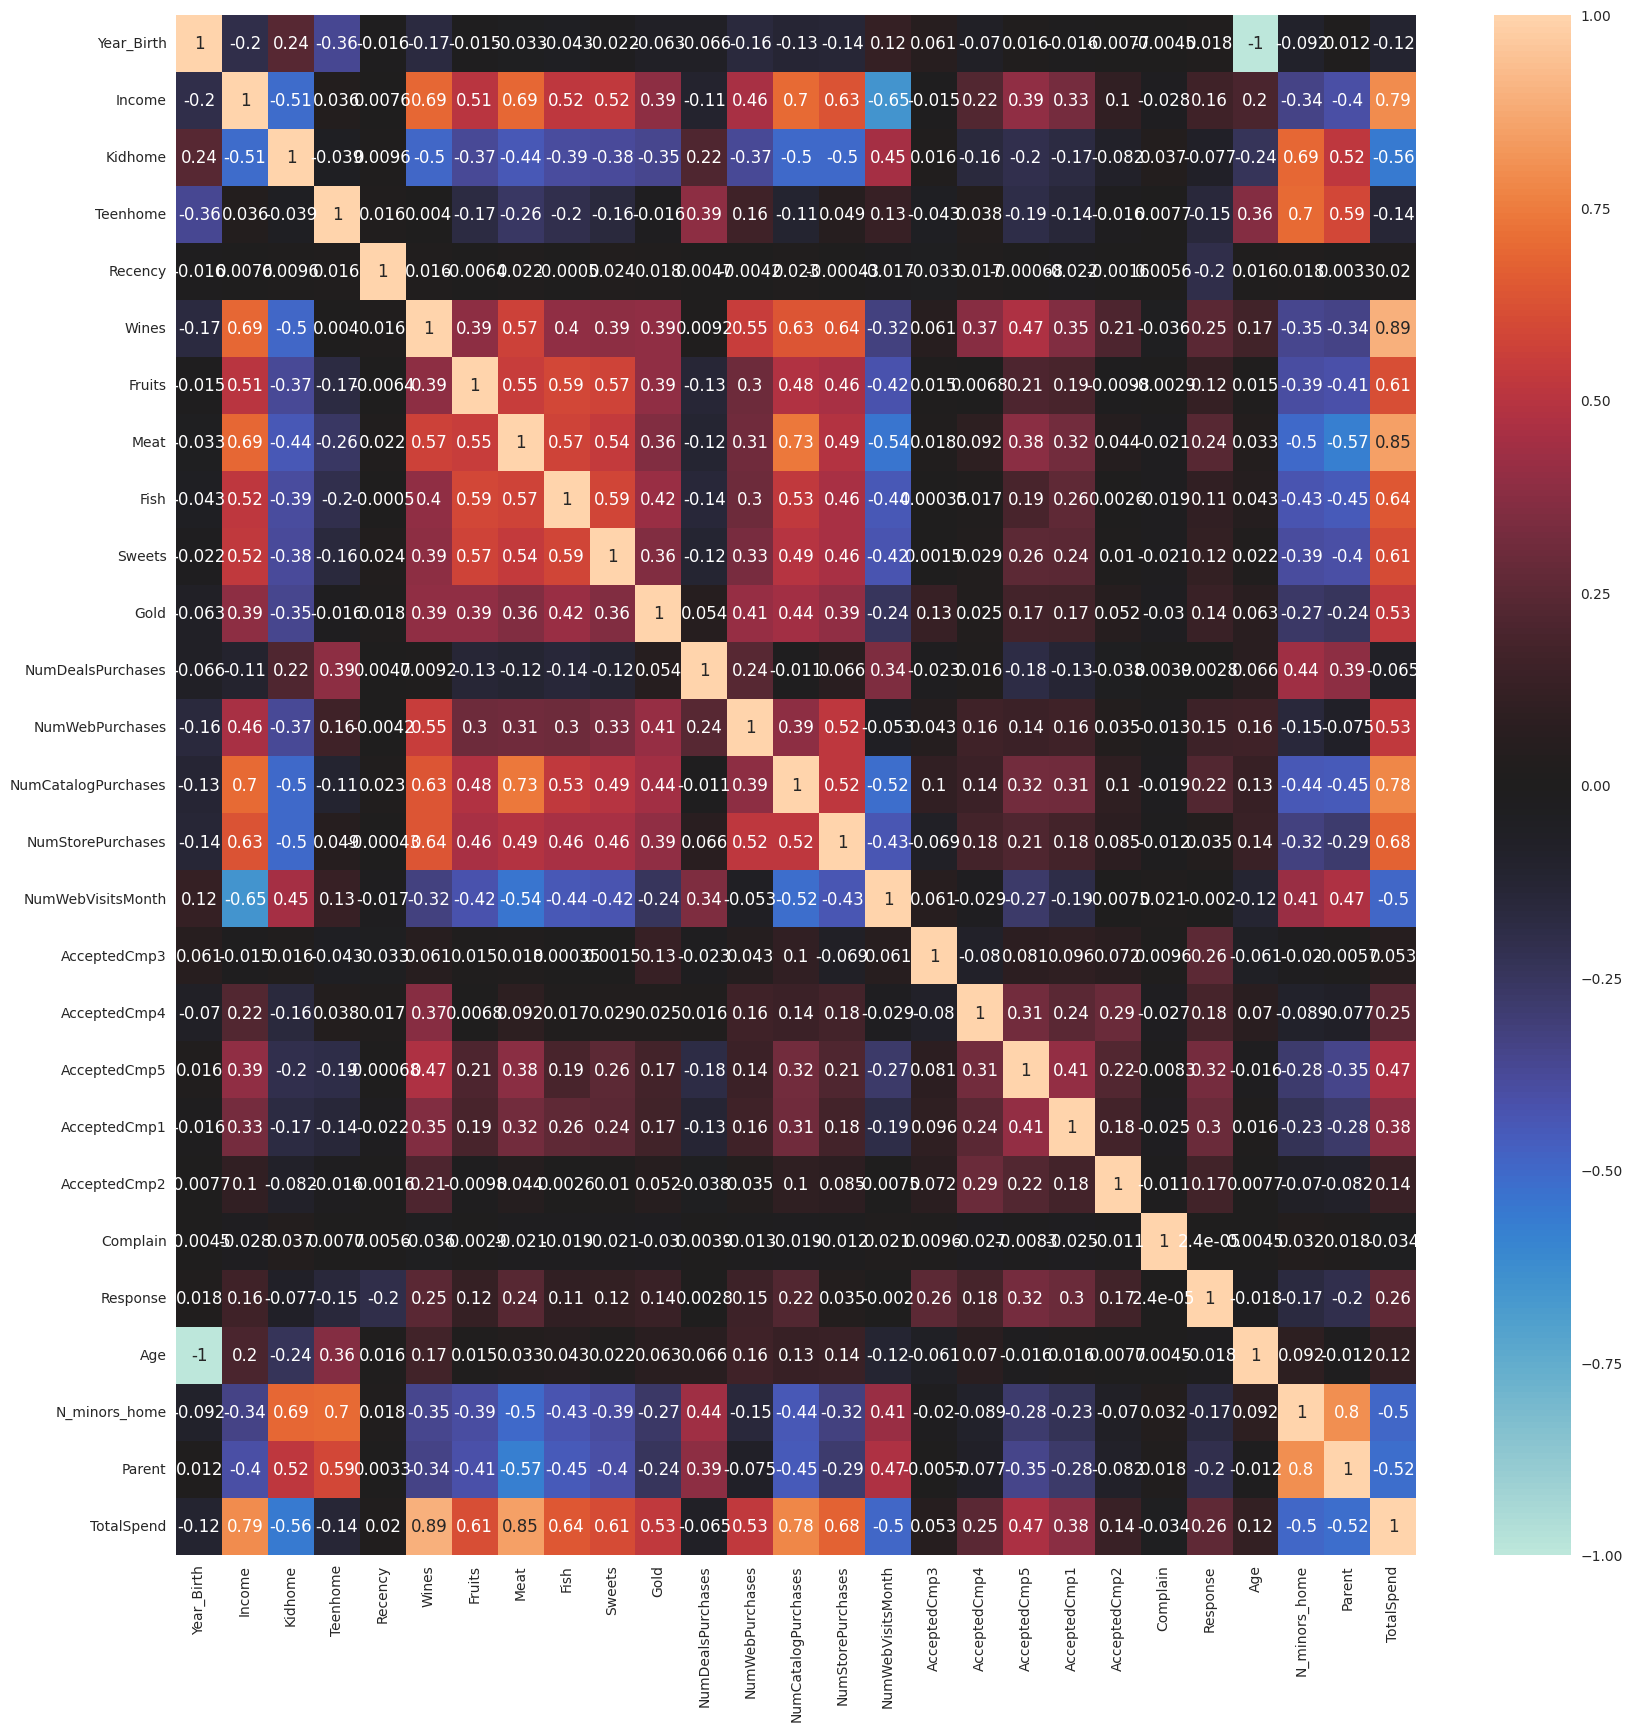

In [35]:
# Correlation matrix
numeric_columns = df.select_dtypes(include = ['number'])
plt.figure(figsize=(20, 20))  
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True, center=0)
plt.show()

In [36]:
# Creating a shorter version of the df based on the most promising features

df_trimmed = df.loc[:, ['Income', 'Age', 'Parent', 'N_minors_home', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'TotalSpend', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

<Axes: >

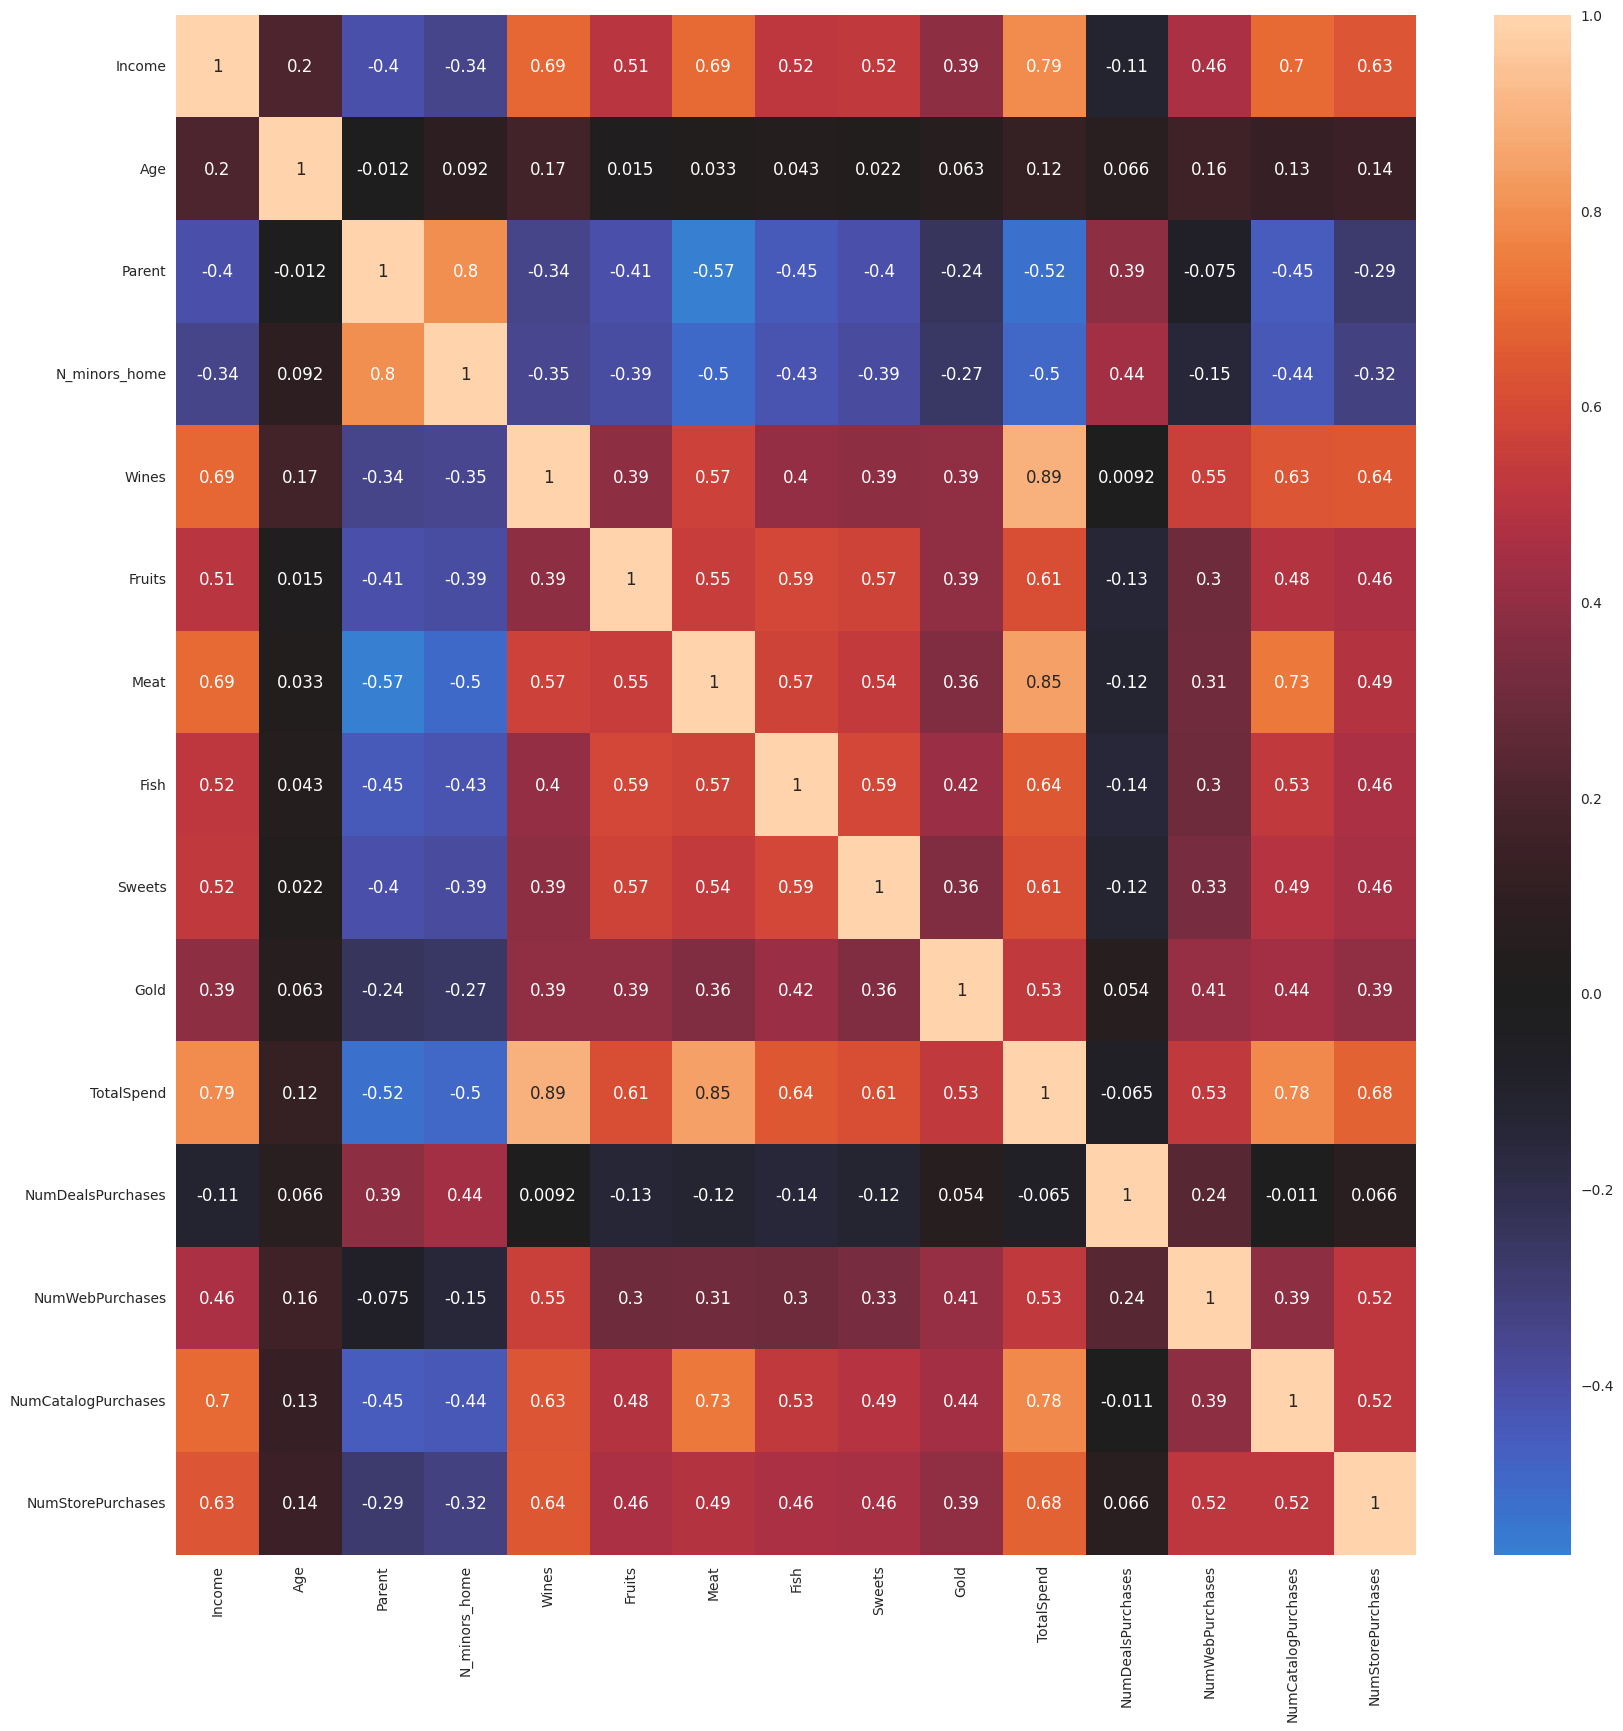

In [37]:
# Updated correlation matrix

plt.figure(figsize=(20,20))  
correlation = df_trimmed.corr()
sns.heatmap(correlation, annot=True, center=0)

# **K-means clustering**

In [39]:
# Applying z-score normalisation
scaler = StandardScaler()

# Fitting the scaler to the data and transforming it
df_scaled = pd.DataFrame(scaler.fit_transform(df_trimmed), columns = df_trimmed.columns)

In [40]:
# Initiating PCA to reduce dimensions aka features to 3 and transforming the data
dim_ds = pd.DataFrame(PCA(n_components = 3).fit_transform(df_scaled), columns = ['column1', 'column2', 'column3'])
dim_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
column1,2208.0,0.000000e+00,2.650505,-4.117825,-2.449036,-0.793914,2.285328,7.475993
column2,2208.0,3.218038e-17,1.392512,-3.192067,-1.043044,-0.182053,0.981685,5.462658
column3,2208.0,1.850372e-17,1.010950,-3.748064,-0.670665,0.035861,0.692791,3.921231


Elbow Method to determine the optimal number of clusters:


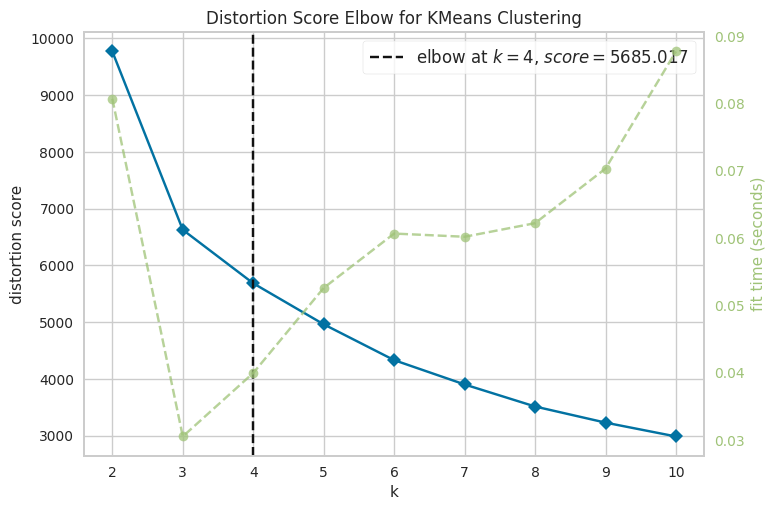

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Applying the elbow method for deternining the number of clusters

print('Elbow Method to determine the optimal number of clusters:')
elbow_visualiser = KElbowVisualizer(KMeans(n_init = 10), k = 10)
elbow_visualiser.fit(dim_ds)
elbow_visualiser.show()

In [55]:
# Defining the number of clusters (K)
num_clusters = 4

# Initialising and fitting the KMeans model
kmeans = KMeans(n_clusters = num_clusters, n_init = 10)
cluster_labels = kmeans.fit_predict(dim_ds)
df_trimmed['ClustersK'] = cluster_labels

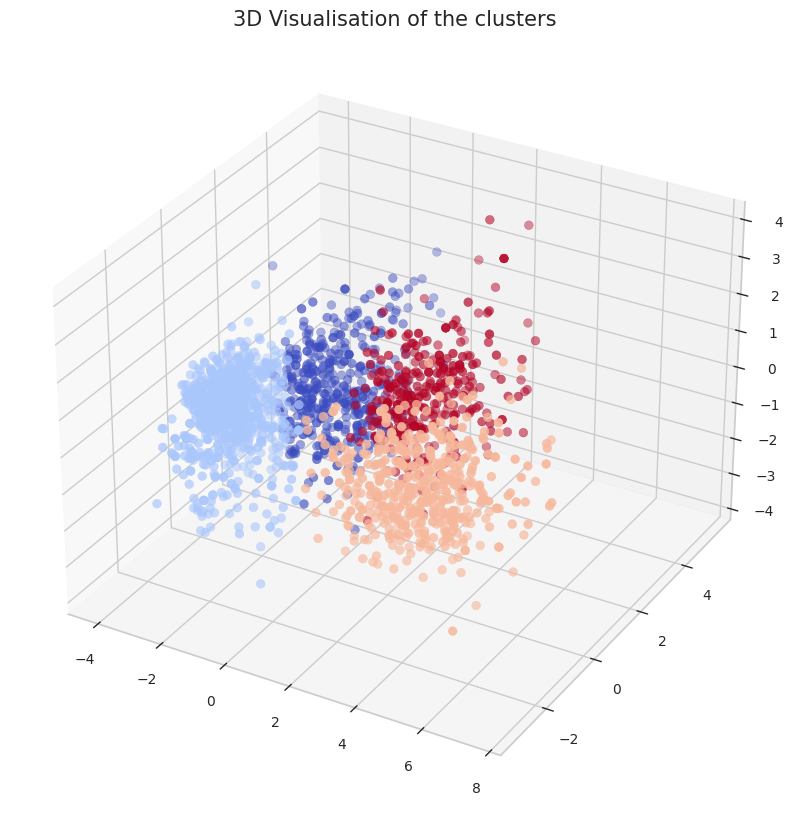

In [62]:
# Visualising the clusters in a 3D plot

plt.figure(figsize = (12, 10))
ax = plt.subplot(111, projection = '3d')
scatter = ax.scatter(x, y, z, s = 40, c = dim_ds['ClustersK'], marker = 'o', cmap = 'coolwarm')
ax.set_title('3D Visualisation of the clusters', fontsize = 15)
plt.show()

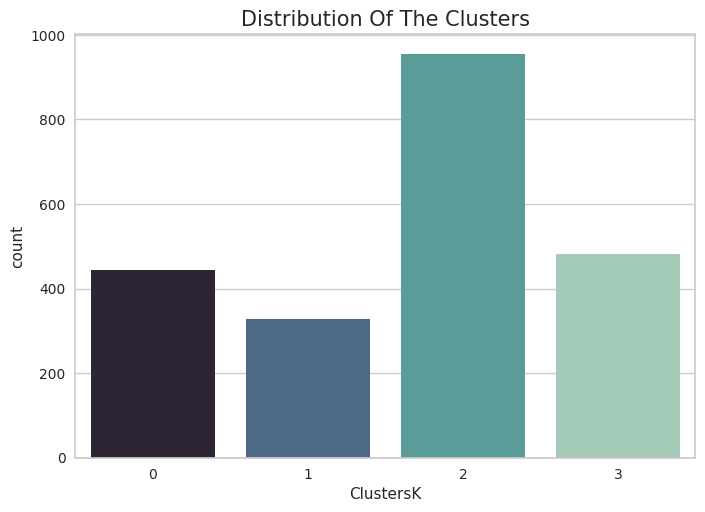

In [57]:
#Examining the number of entries per cluster

mako_palette = ['#2e2237', '#446791', '#4fa8a1', '#9cd2b7']
fig = sns.countplot(x = df_trimmed['ClustersK'], palette = mako_palette)
fig.set_title('Distribution Of The Clusters', fontsize = 15)
plt.show()

# **Describing the clusters**

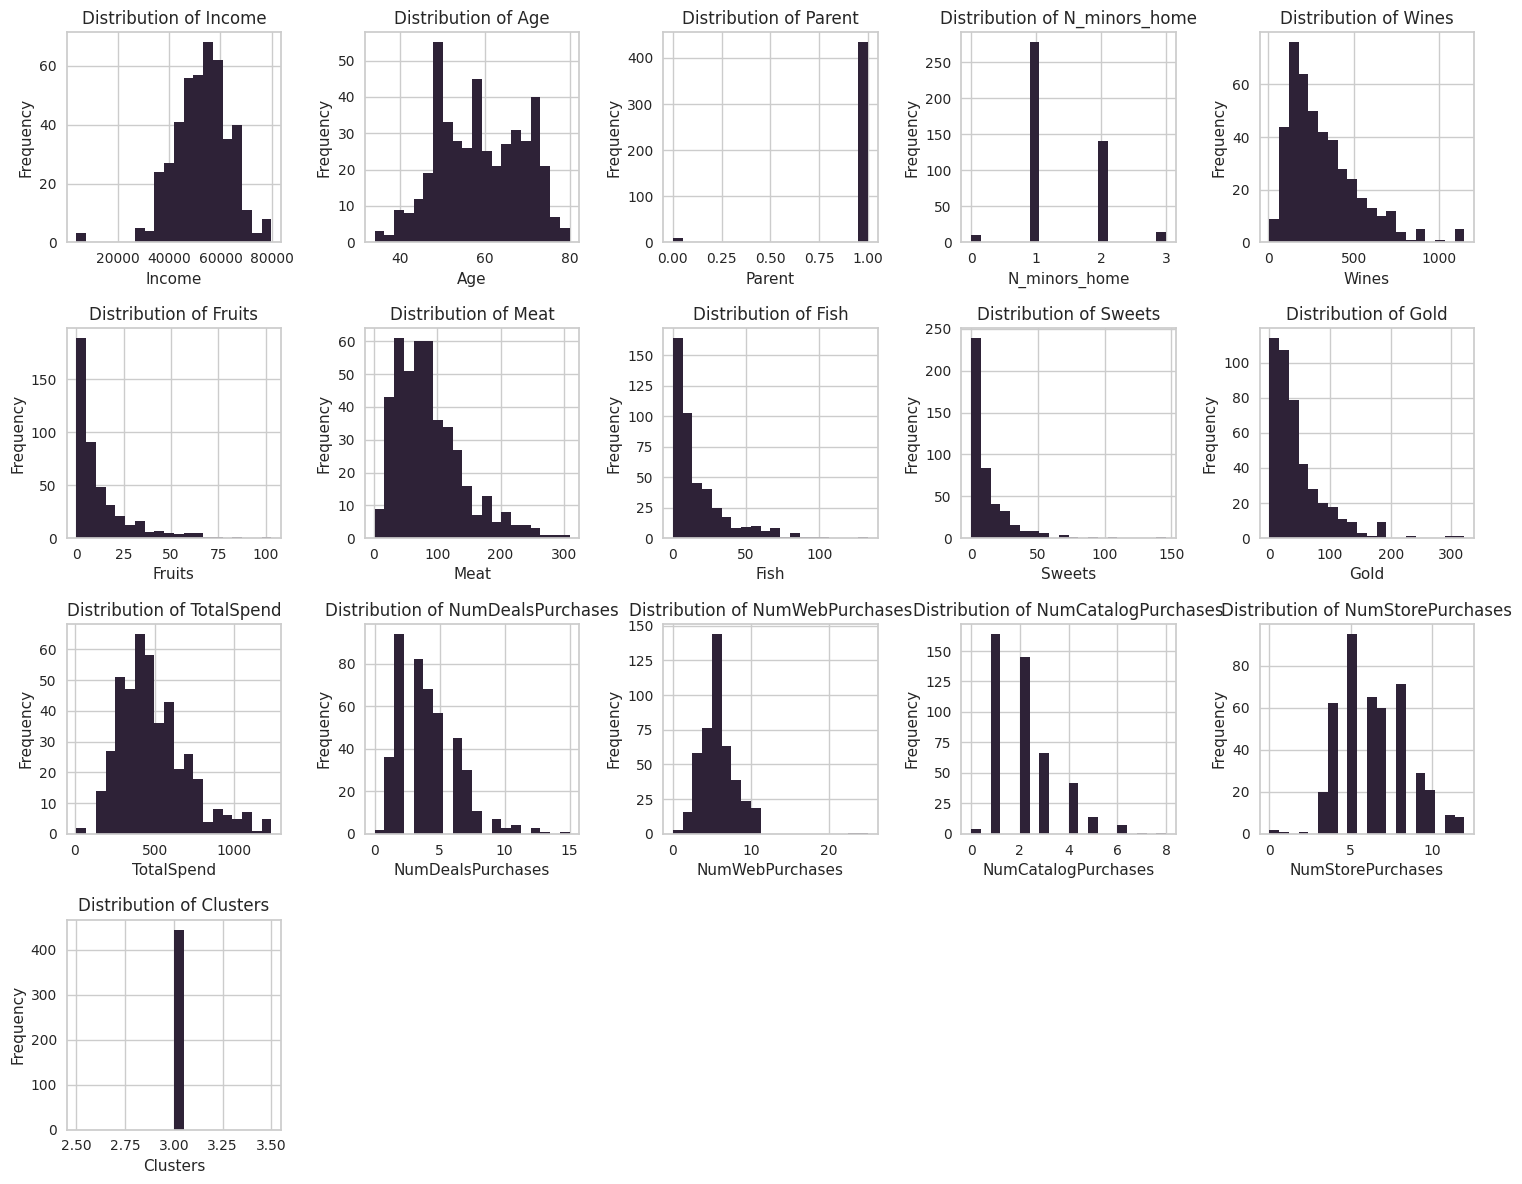

In [58]:
# Showcasing the data for cluster 0

cluster_0_df = df_trimmed[df_trimmed['ClustersK'] == 0]

variable_names = [col for col in cluster_0_df.columns if col != 'ClustersK']
colors = ['#2e2237']
n_variables = len(variable_names)
n_rows = (n_variables - 1) // 5 + 1
fig, axes = plt.subplots(n_rows, 5, figsize=(15, 3 * n_rows), squeeze=False)

for i, variable in enumerate(variable_names):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    cluster_0_df[variable].plot.hist(ax=ax, bins=20, color=colors)
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

for i in range(n_variables, n_rows * 5):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

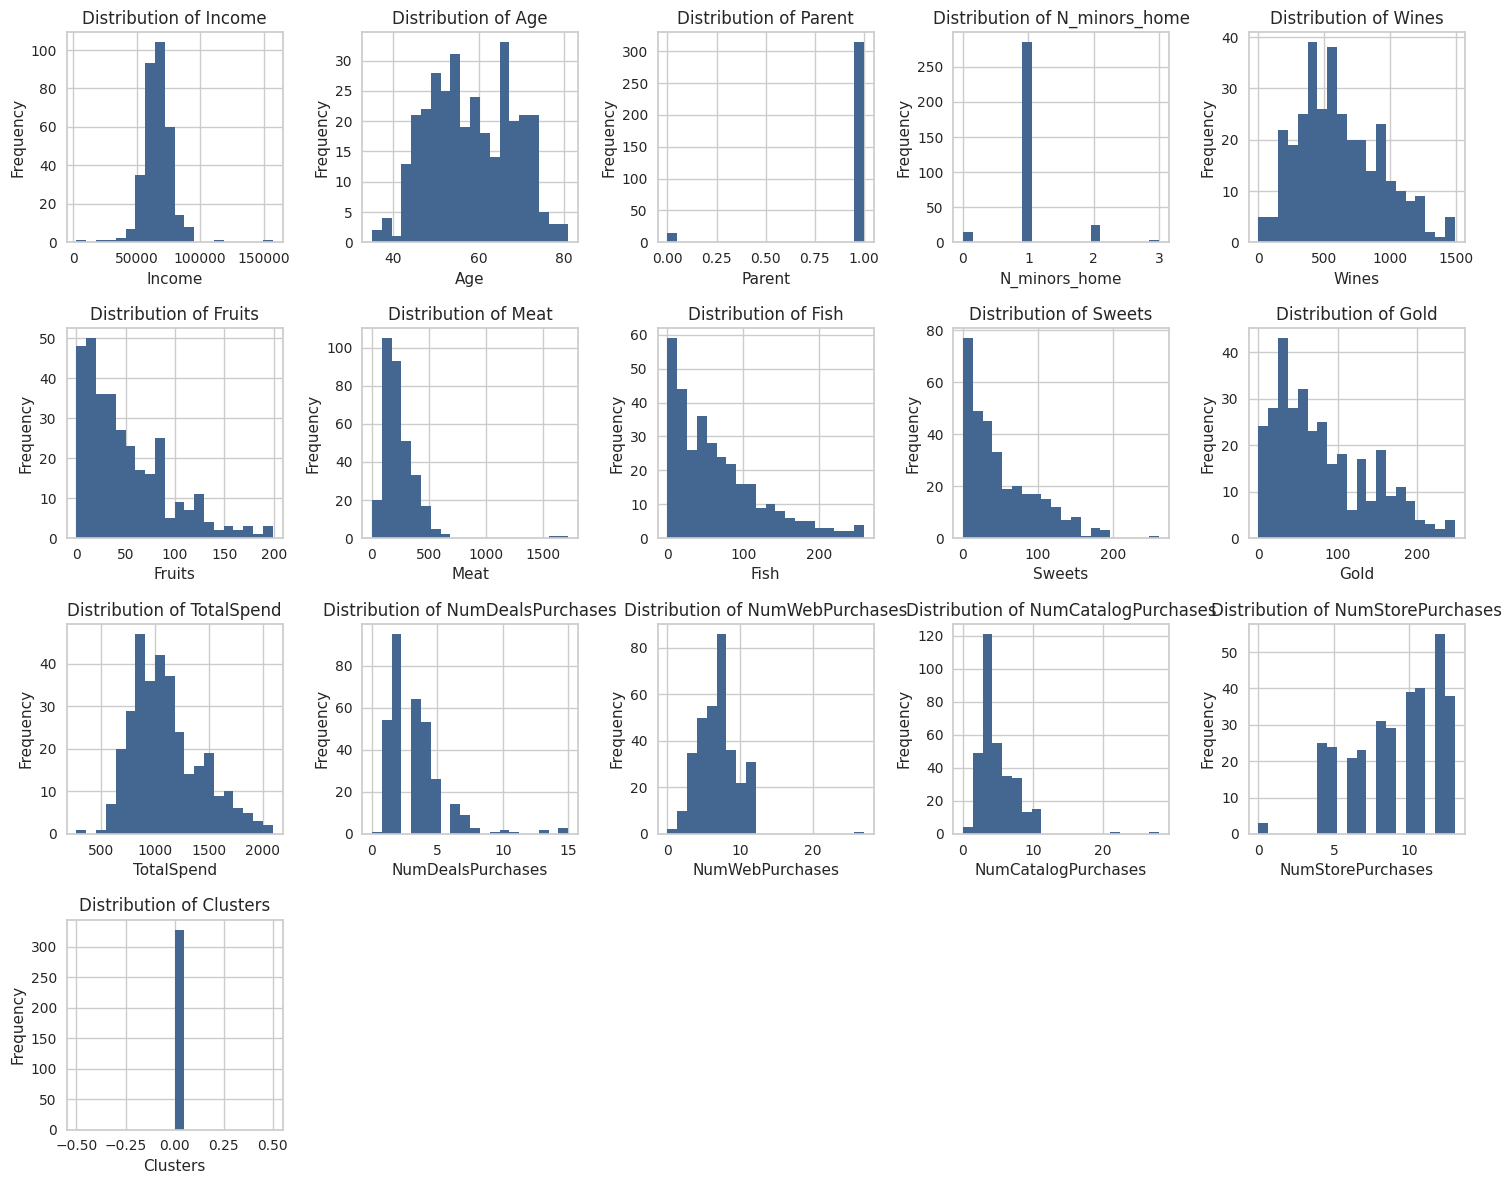

In [59]:
# Showcasing the data for cluster 1

cluster_1_df = df_trimmed[df_trimmed['ClustersK'] == 1]
variable_names = [col for col in cluster_1_df.columns if col != 'ClustersK']
colors = ['#446791']
n_variables = len(variable_names)
n_rows = (n_variables - 1) // 5 + 1
n_cols = min(n_variables, 5)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)

for i, variable in enumerate(variable_names):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    cluster_1_df[variable].plot.hist(ax=ax, bins=20, color=colors)  
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

for i in range(n_variables, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

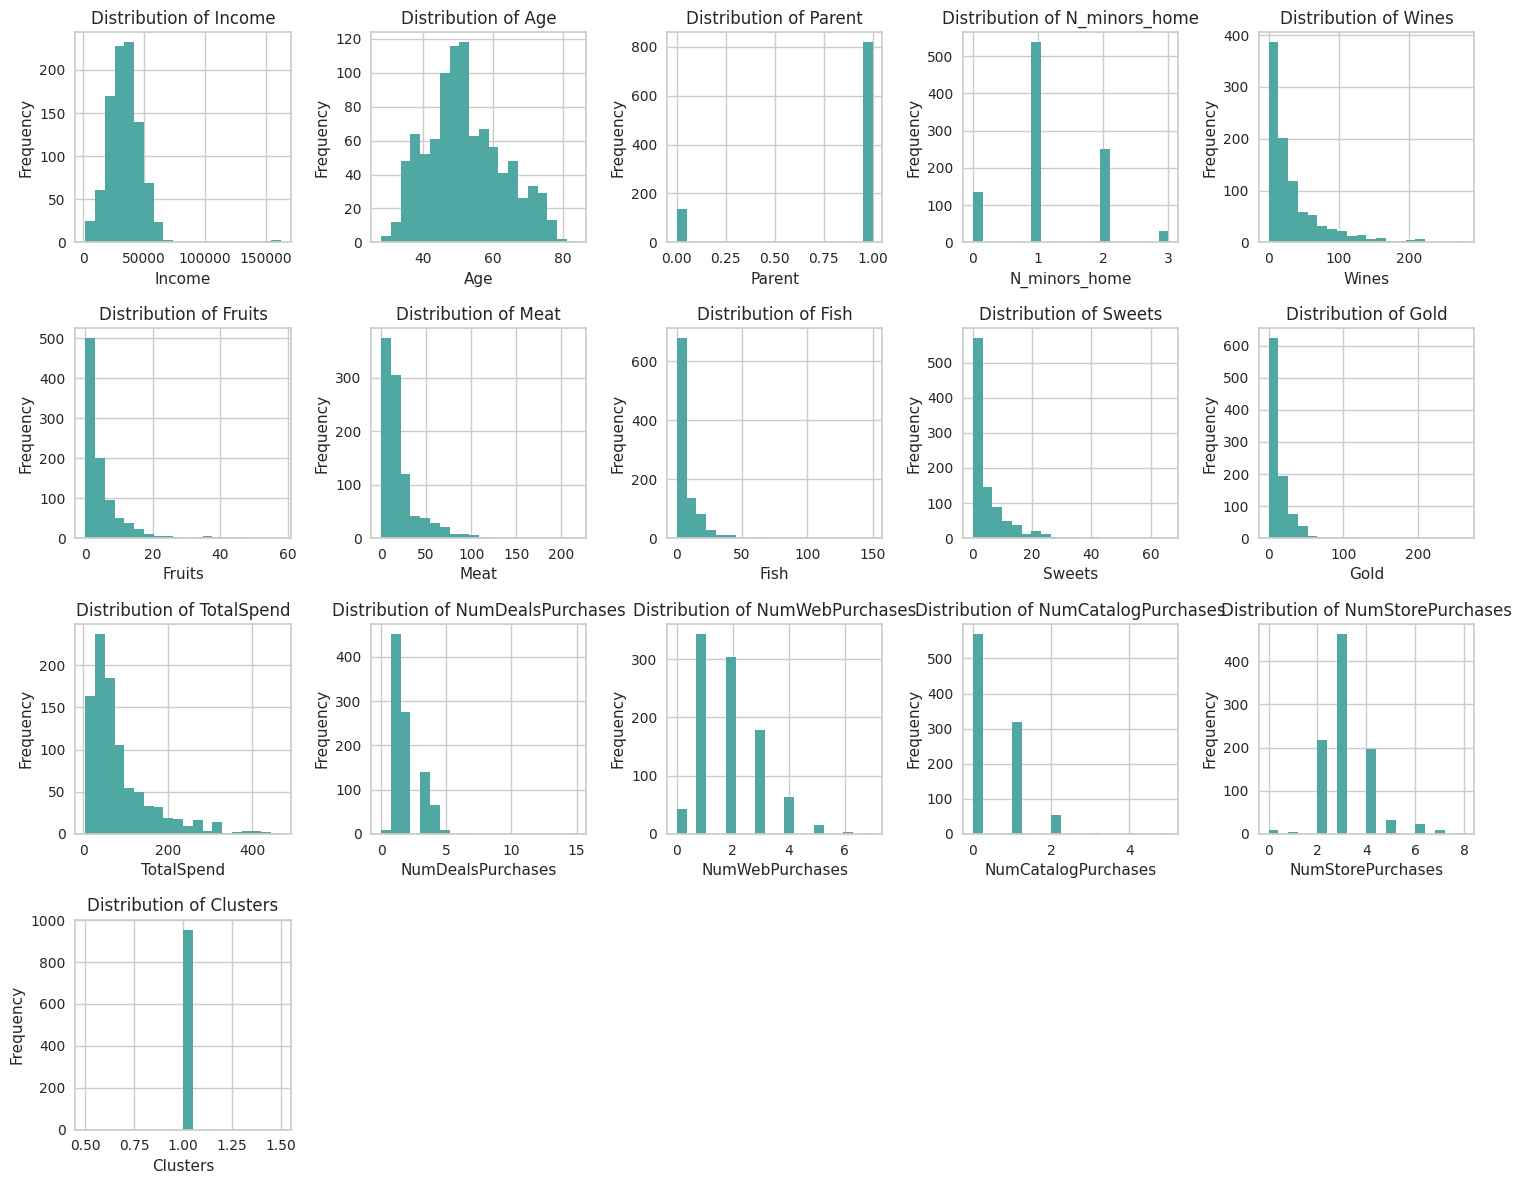

In [60]:
# Showcasing the data for cluster 2

cluster_2_df = df_trimmed[df_trimmed['ClustersK'] == 2]
variable_names = [col for col in cluster_2_df.columns if col != 'ClustersK']
colors = ['#4fa8a1']
n_variables = len(variable_names)
n_rows = (n_variables - 1) // 5 + 1
n_cols = min(n_variables, 5)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)
for i, variable in enumerate(variable_names):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    cluster_2_df[variable].plot.hist(ax=ax, bins=20, color=colors)  
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')
for i in range(n_variables, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

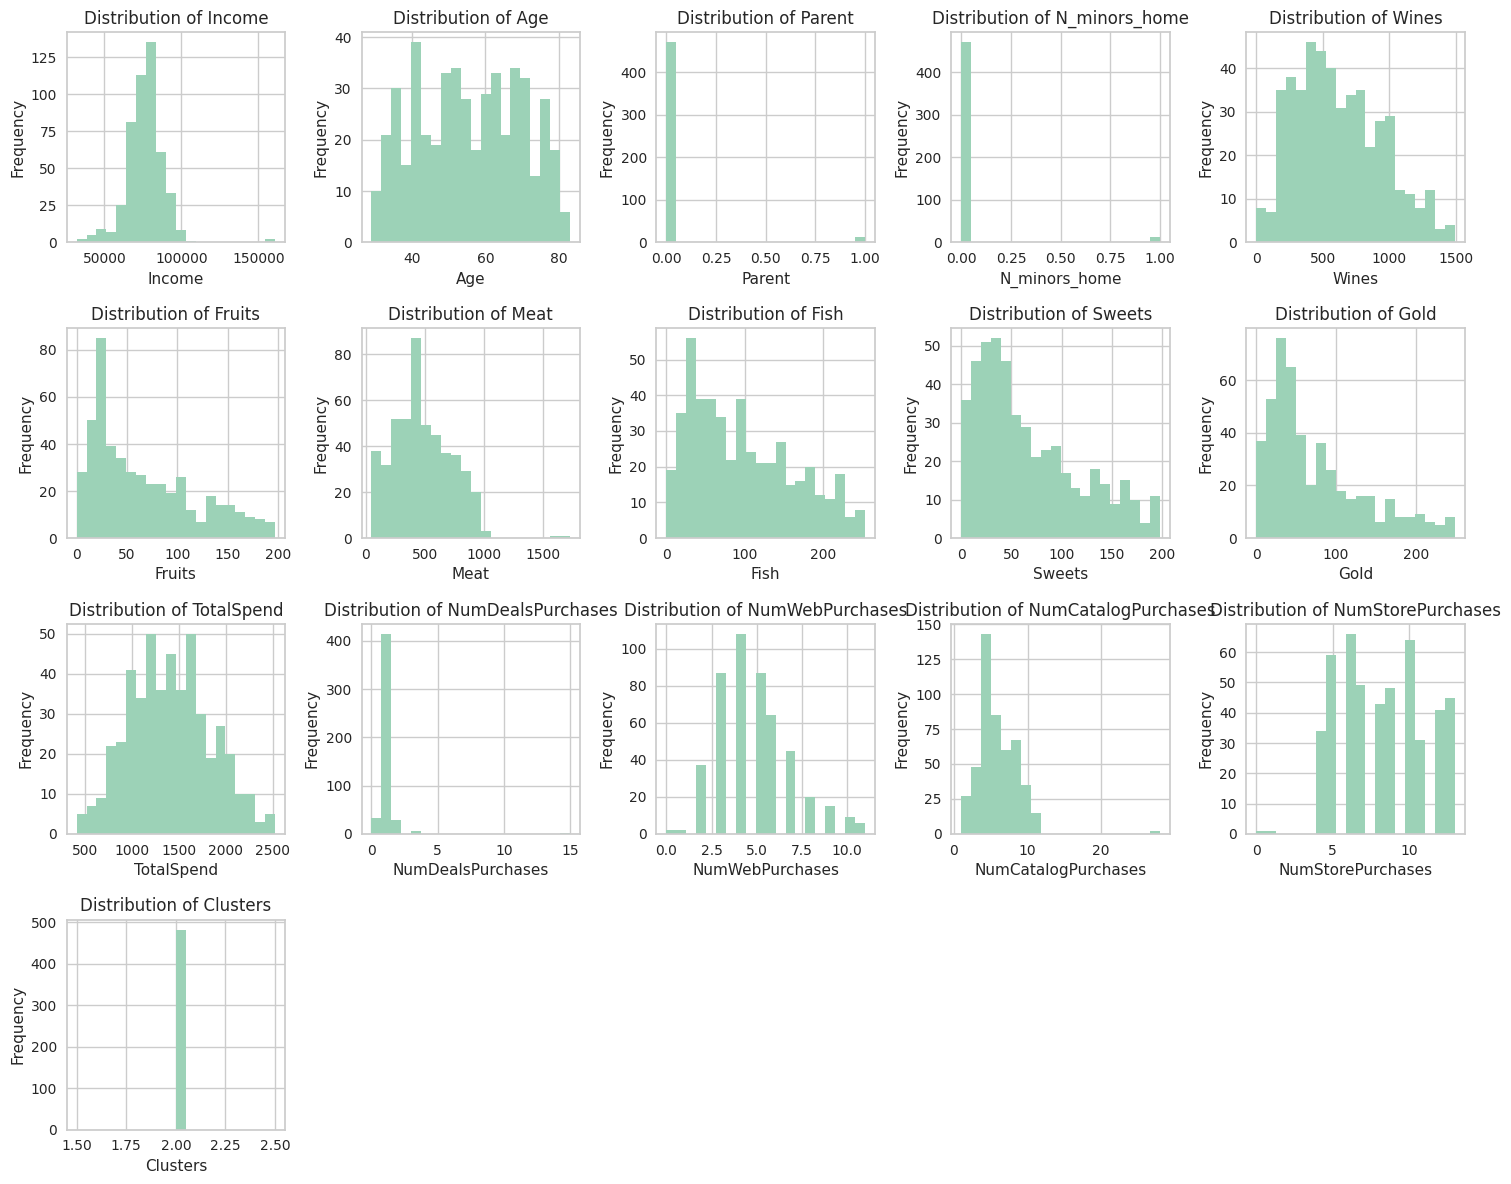

In [61]:
# Showcasing the data for cluster 3

cluster_3_df = df_trimmed[df_trimmed['ClustersK'] == 3]
variable_names = [col for col in cluster_3_df.columns if col != 'ClustersK']
colors = ['#9cd2b7']
n_variables = len(variable_names)
n_rows = (n_variables - 1) // 5 + 1
n_cols = min(n_variables, 5)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)
for i, variable in enumerate(variable_names):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    cluster_3_df[variable].plot.hist(ax=ax, bins=20, color=colors)  
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

for i in range(n_variables, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()